***mean_var_std***

In [1]:
import numpy as np
a = [2,6,2,8,4,0,1,5,7]

listToArray = np.array(a)
array3d = listToArray.reshape((3,3))

meanList = [array3d.mean(axis=0).tolist(), array3d.mean(axis = 1).tolist(), array3d.mean().tolist()]
varianceList = [array3d.var(axis=0).tolist(),array3d.var(axis=1).tolist(), array3d.var().tolist()]
standardDevList = [array3d.std(axis=0).tolist(),array3d.std(axis=1).tolist(), array3d.std().tolist()]
maxList = [array3d.max(axis=0).tolist(), array3d.max(axis=1).tolist(), array3d.max().tolist()]
minList = [array3d.min(axis=0).tolist(), array3d.min(axis=1).tolist(), array3d.min().tolist()]
sumList = [array3d.sum(axis=0).tolist(), array3d.sum(axis=1).tolist(), array3d.sum().tolist()]


calculations = {}

calculations['mean'] = meanList
calculations['variance'] = varianceList
calculations['standard deviation'] = standardDevList
calculations['max'] = maxList
calculations['min'] = minList
calculations['sum'] = sumList

print(calculations)

{'mean': [[3.6666666666666665, 5.0, 3.0], [3.3333333333333335, 4.0, 4.333333333333333], 3.888888888888889], 'variance': [[9.555555555555557, 0.6666666666666666, 8.666666666666666], [3.555555555555556, 10.666666666666666, 6.222222222222221], 6.987654320987654], 'standard deviation': [[3.091206165165235, 0.816496580927726, 2.943920288775949], [1.8856180831641267, 3.265986323710904, 2.494438257849294], 2.6434171674156266], 'max': [[8, 6, 7], [6, 8, 7], 8], 'min': [[1, 4, 0], [2, 0, 1], 0], 'sum': [[11, 15, 9], [10, 12, 13], 35]}


**demographic_data_analyzer**

In [2]:
import pandas as pd

df = pd.read_csv('/content/adult.data.csv')

# How many of each race are represented in this dataset? This should be a Pandas series with race names as the index labels.
race_count = df['race'].value_counts()

# What is the average age of men?
avg_age_men = df[df['sex'] == 'Male']['age'].mean()
average_age_men = round(avg_age_men, 1)

# What is the percentage of people who have a Bachelor's degree?
total_bachelors = df[df['education'] == 'Bachelors'].shape[0]
total_pop = df.shape[0]
percent = (total_bachelors/total_pop)*100
percentage_bachelors = round(percent, 1)

# What percentage of people with advanced education (`Bachelors`, `Masters`, or `Doctorate`) make more than 50K?
# What percentage of people without advanced education make more than 50K?
# with and without `Bachelors`, `Masters`, or `Doctorate`


higher_education = df['education'].isin(['Bachelors', 'Masters', 'Doctorate'])
lower_education = ~higher_education

# percentage with salary >50K
earn50k = df['salary'] == '>50K'
sumHiAnd50 = (higher_education & earn50k).sum()
sumLowAnd50 = (lower_education & earn50k).sum()
higher_education_rich = round(sumHiAnd50 / higher_education.sum() * 100, 1)
lower_education_rich = round(sumLowAnd50 / lower_education.sum() * 100, 1)

# What is the minimum number of hours a person works per week (hours-per-week feature)?
min_work_hours = df['hours-per-week'].min()

# What percentage of the people who work the minimum number of hours per week have a salary of >50K?
num_min_workers = min_work_hours == df['hours-per-week']
sumMinWorkerAndRich = (num_min_workers & earn50k).sum()
rich_percentage = sumMinWorkerAndRich / num_min_workers.sum() *100

# What country has the highest percentage of people that earn >50K?
richAndCountry = df[earn50k]['native-country'].value_counts()
countryCounts = df['native-country'].value_counts()
percentCount = ( richAndCountry / countryCounts  * 100)
percentCountSorted = percentCount.sort_values(ascending=False)
highest_earning_country = percentCountSorted.index[0]
highest_earning_country_percentage = round(percentCountSorted.iloc[0],1)

# Identify the most popular occupation for those who earn >50K in India.
india = df['native-country'] == 'India'
earnIndia = df[india & earn50k]
occupationIndia = earnIndia['occupation'].value_counts()
top_IN_occupation = occupationIndia.index[0]

**medical_data_visualizer**

In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

df = pd.read_csv('/content/medical_examination.csv')

# Add 'overweight' column
heightInMeter = df['height']/100
weight = df['weight']
BMI = weight / np.square(heightInMeter)
overweight = BMI > 25
df['overweight'] = overweight.astype(int)

# Normalize data by making 0 always good and 1 always bad. If the value of 'cholesterol' or 'gluc' is 1, make the value 0. If the value is more than 1, make the value 1.
df['gluc'] = (df['gluc'] != 1).astype(int)
df['cholesterol'] = (df['cholesterol'] != 1).astype(int)


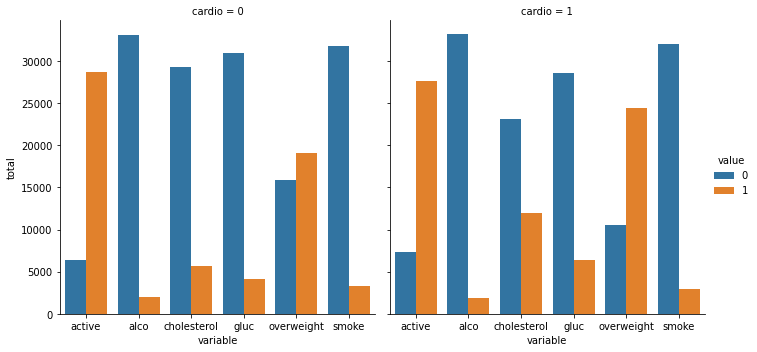

In [4]:
#catagorical plot
# Create DataFrame for cat plot using `pd.melt` using just the values from 'cholesterol', 'gluc', 'smoke', 'alco', 'active', and 'overweight'.
columns = [
  'active',
  'alco',
  'cholesterol',
  'gluc',
  'overweight',
  'smoke'
]
df_cat = pd.melt(df, id_vars=["cardio"], value_vars=columns)

# Group and reformat the data to split it by 'cardio'. Show the counts of each feature. You will have to rename one of the collumns for the catplot to work correctly.
df_cat = df_cat.reset_index() \
            .groupby(['variable', 'cardio', 'value']) \
            .agg('count') \
            .rename(columns={'index': 'total'}) \
            .reset_index()

# Draw the catplot with 'sns.catplot()'
fig = sns.catplot(
    x="variable",
    y="total",
    col="cardio",
    hue="value",
    data=df_cat,
    kind="bar").fig

# Do not modify the next two lines
fig.savefig('catplot.png')


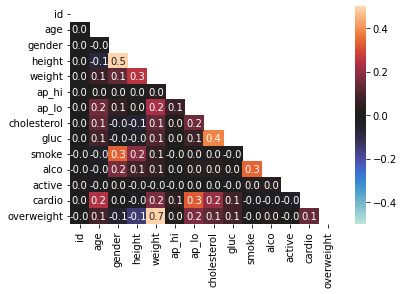

In [5]:
#Heat map
df_heat = df[
      (df['ap_lo'] <= df['ap_hi'])
      & (df['height'] >= df['height'].quantile(0.025))
      & (df['height'] <= df['height'].quantile(0.975))
      & (df['weight'] >= df['weight'].quantile(0.025))
      & (df['weight'] <= df['weight'].quantile(0.975))
    ]

# Calculate the correlation matrix
corr = df_heat.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
fig = plt.figure()

# Draw the heatmap with 'sns.heatmap()'
sns.heatmap(corr, mask=mask,
            annot=True, fmt='.1f',
            center=0, vmin=-0.5, vmax=0.5)

# Do not modify the next two lines
fig.savefig('heatmap.png')

**time_series_visualizer**

In [6]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

# Import data (Make sure to parse dates. Consider setting index column to 'date'.)
df = pd.read_csv('fcc-forum-pageviews.csv', index_col="date", parse_dates=True)

# Clean data
df = df[(df['value'] >= df['value'].quantile(0.025))
        & (df['value'] <= df['value'].quantile(0.975))]


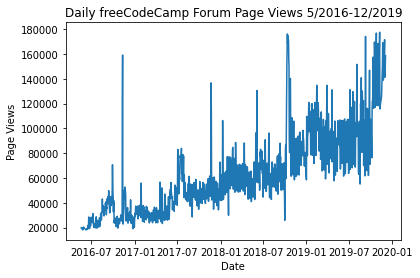

In [7]:
#line plot 
# Draw line plot
fig = plt.figure()
plt.plot(df.index, df.value)
plt.xlabel('Date')
plt.ylabel('Page Views')
plt.title('Daily freeCodeCamp Forum Page Views '
            + df.index[0].strftime('%-m/%Y')
            + '-'
            + df.index[-1].strftime('%-m/%Y'))

# Save image and return fig (don't change this part)
fig.savefig('line_plot.png')

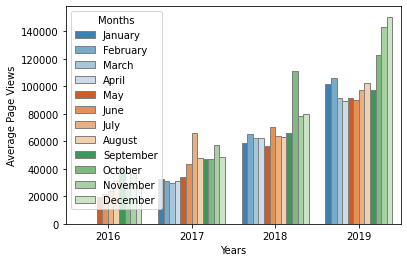

In [8]:
#bar plot
# Copy and modify data for monthly bar plot
df_bar = df.copy()
df_bar['year'] = df.index.year
df_bar['month_name'] = df.index.strftime('%B')

df_bar = df_bar.groupby(['year', 'month_name']) \
                .agg('mean').reset_index()

months = pd.date_range('2020-01', '2020-12', freq='MS') \
          .strftime('%B').tolist()

# Draw bar plot
fig = plt.figure()

sns.barplot(
    x="year",
    y="value",
    hue="month_name",
    hue_order=months,
    data=df_bar,
    palette="tab20c",
    ec="grey")

plt.xlabel('Years')
plt.ylabel('Average Page Views')
plt.legend(title='Months', loc='upper left')

# Save image and return fig (don't change this part)
fig.savefig('bar_plot.png')

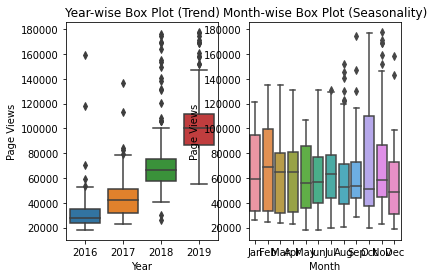

In [9]:
#box plot
# Prepare data for box plots (this part is done!)
df_box = df.copy()
df_box.reset_index(inplace=True)
df_box['year'] = [d.year for d in df_box.date]
df_box['month'] = [d.strftime('%b') for d in df_box.date]

months = pd.date_range('2020-01', '2020-12', freq='MS') \
          .strftime('%b').tolist()

# Draw box plots (using Seaborn)
fig, axes = plt.subplots(1,2)

ax = axes[0]
sns.boxplot(x="year", y="value", data=df_box, ax=ax)
ax.set_title('Year-wise Box Plot (Trend)')
ax.set_xlabel('Year')
ax.set_ylabel('Page Views')

ax = axes[1]
sns.boxplot(x="month", y="value", data=df_box, order=months, ax=ax)
ax.set_title('Month-wise Box Plot (Seasonality)')
ax.set_xlabel('Month')
ax.set_ylabel('Page Views')

# Save image and return fig (don't change this part)
fig.savefig('box_plot.png')

**sea_level_predictor**

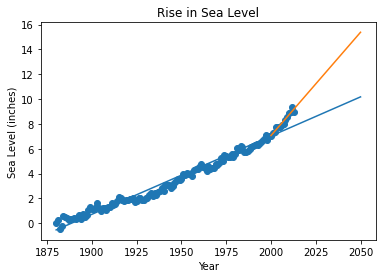

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import linregress
import numpy as np

# Read data from file
df = pd.read_csv('epa-sea-level.csv')

# Create scatter plot
plt.scatter(df['Year'], df['CSIRO Adjusted Sea Level'])

# Create first line of best fit
firstLine = linregress(df['Year'], df['CSIRO Adjusted Sea Level'])
xFirst = np.arange(df['Year'].min(),2051)
yFirst = xFirst*firstLine.slope + firstLine.intercept

plt.plot(xFirst,yFirst)

# Create second line of best fit
df_2000 = df[df['Year'] >= 2000]

secondLine = linregress(df_2000['Year'], df_2000['CSIRO Adjusted Sea Level'])
xSecond = np.arange(2000,2051)
ySecond = xSecond*secondLine.slope + secondLine.intercept

plt.plot(xSecond,ySecond)

# Add labels and title
plt.xlabel('Year')
plt.ylabel('Sea Level (inches)')
plt.title('Rise in Sea Level')

# Save plot and return data for testing (DO NOT MODIFY)
plt.savefig('sea_level_plot.png')